In [1]:
# %reset
# %load_ext autoreload
# %autoreload 2

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from info.utils.pdf_computer import pdfComputer
from info.models.logistic_network import Logistic
from info.utils.causal_network import search_mpid_condition, causal_network
from info.utils.others import reorganize_data
from info.core.info import info
from info.core.info_network import info_network

%matplotlib inline

In [3]:
# The number of bins in each dimension
n1, n2, n3 = 10, 25, 30

# Settings for plot
plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18

# Generate the variable values
lag  = 1
e    = 1.
ez   = .2
# n    = 2
# adjM = np.array([[0, 0], [1, 0]])
# lagM = np.array([[0, 0], [lag, 0]])
n    = 3
adjM = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
lagM = np.array([[0, lag, lag], [lag, 0, lag], [lag, lag, 0]])

# Parameters for simulation
nstep = 1000
noiseType = 'additive'
noiseDist = 'uniform'
noiseOn   = [1, 1, 1]
noisePara = [1, 0, 1]

# Define the corresponding causalDict
causalDict = {0: [(1,-1), (2,-1)],
              1: [(0,-1), (2,-1)],
              2: [(0,-1), (1,-1)]}
taumax=5
sidepath=False
verbosity=1

# Generate the outputs
logistic = Logistic(n, adjM, lagM, e, ez, noiseType=noiseType, 
                    noiseDist=noiseDist, noisePara=noisePara)
results = logistic.simulate(nstep)
# d1, d2, d3 = results[0,:], results[1,:], results[2,:]

# Initialize the networks
network1 = info_network(results.T, causalDict, nx=n1, taumax=taumax)
network=causal_network(causalDict, taumax)

# Plot
# t = range(nstep)
# # plt.plot(t, results[0, :], 'b')
# # plt.plot(t, results[1, :], 'k')
# plt.plot(d1[:-lag],d2[lag:],'.')
# plt.title('Time series data')
# plt.xlabel('x1(t-1)')
# plt.ylabel('x2(t)')
# plt.show()
# # Save
# np.savetxt('data.csv',results,delimiter=',')

In [15]:
# 2D -- unconditioned
# Define the two sources and the target
source, target = (0, -1), (1, 0)

testinfo1 = network1.compute_2n_infotrans(source, target, conditioned=False, normalized=True)
testinfo1.allInfo

# Define the source and the target
sind, tind = 0, 1
testinfo1set = network1.compute_2n_infotrans_set(sind, tind, conditioned=False, 
                                              taumax=taumax, normalized=True)

In [25]:
# 2D -- conditioned
# Define the two sources and the target
source, target = (0, -1), (1, 0)

testinfo2 = network1.compute_2n_infotrans(source, target, conditioned=True, normalized=True)
testinfo2.allInfo

# Define the source and the target
sind, tind = 0, 1
testinfo2set = network1.compute_2n_infotrans_set(sind, tind, conditioned=True, 
                                              taumax=taumax, normalized=True)

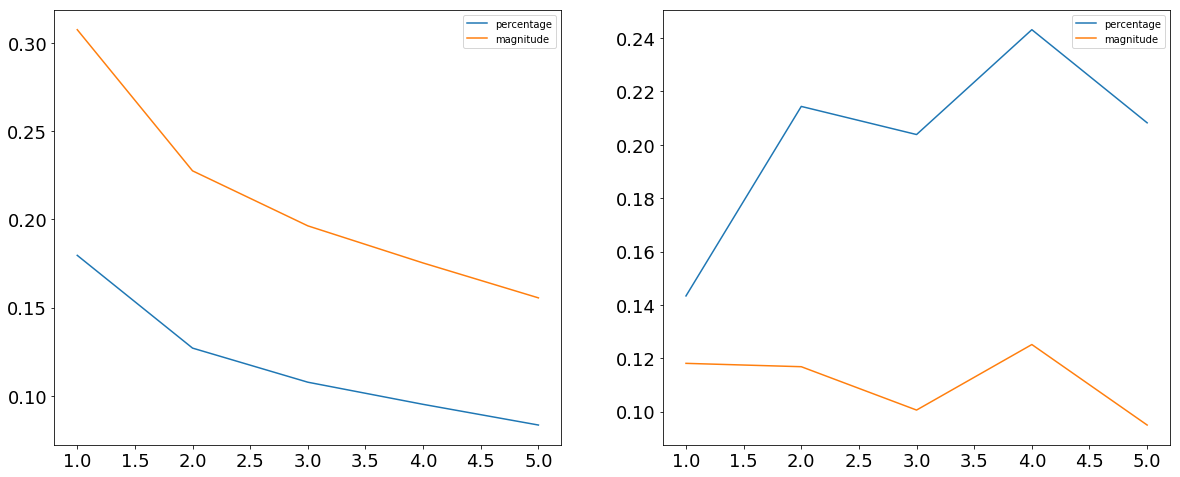

In [43]:
lags = range(1, taumax+1)
test1p = [testinfo.allInfo.loc['I(X;Y)', 'norm_p'] for testinfo in testinfo1set]
test1m = [testinfo.allInfo.loc['I(X;Y)', 'norm_m'] for testinfo in testinfo1set]
test2p = [testinfo.allInfo.loc['I(X;Y|W)', 'norm_p'] for testinfo in testinfo2set]
test2m = [testinfo.allInfo.loc['I(X;Y|W)', 'norm_m'] for testinfo in testinfo2set]

fig, axes = plt.subplots(1,2,figsize=(20,8))
axes[0].plot(lags, test1p, label='percentage')
axes[0].plot(lags, test1m, label='magnitude')
axes[0].legend()

axes[1].plot(lags, test2p, label='percentage')
axes[1].plot(lags, test2m, label='magnitude')
axes[1].legend()

In [12]:
# 3D -- unconditioned
# Define the two sources and the target
source1, source2 = (0, -1), (1, -1)
target = (2, 0)

testinfo1 = network1.compute_3n_infotrans(source1, source2, target, conditioned=False, normalized=True)
print testinfo1.allInfo

          ordinary    norm_p    norm_m
I(X;Z)    0.997923  0.141744  0.325913
I(Y;Z)    1.022234  0.145198  0.333853
I(X,Y;Z)  1.307143  0.185666  0.426901
II       -0.713014 -0.101276 -0.232864
R(Z;Y,X)  0.794035  0.112784  0.259325
S(Z;Y,X)  0.081021  0.011508  0.026461
U(Z,X)    0.203888  0.028960  0.066588
U(Z,Y)    0.228199  0.032413  0.074528
Rmin      0.713014  0.101276  0.232864
Isource   0.284374  0.040392  0.092874
RMMI      0.997923  0.141744  0.325913


,ordinary,norm_p,norm_m
I(X;Z),0.997923,0.141744,0.325913
I(Y;Z),1.022234,0.145198,0.333853
"I(X,Y;Z)",1.307143,0.185666,0.426901
II,-0.713014,-0.101276,-0.232864
"R(Z;Y,X)",0.794035,0.112784,0.259325
"S(Z;Y,X)",0.081021,0.011508,0.026461
"U(Z,X)",0.203888,0.028960,0.066588
"U(Z,Y)",0.228199,0.032413,0.074528
Rmin,0.713014,0.101276,0.232864
Isource,0.284374,0.040392,0.092874


In [13]:
# 3D -- conditioned
# Define the two sources and the target
source1, source2 = (0, -1), (1, -1)
target = (2, 0)

testinfo1 = network1.compute_3n_infotrans(source1, source2, target, conditioned=True, normalized=True)
print testinfo1.allInfo

            ordinary    norm_p    norm_m
I(X;Z|W)    0.509061  0.159536  0.166223
I(Y;Z|W)    0.504067  0.157971  0.164592
I(X,Y;Z|W)  0.866289  0.271488  0.282867
II         -0.146839 -0.046018 -0.047947
R(Z;Y,X|W)  0.165002  0.051710  0.053878
S(Z;Y,X|W)  0.018162  0.005692  0.005930
U(Z,X|W)    0.344060  0.107826  0.112345
U(Z,Y|W)    0.339065  0.106260  0.110714
Rmin        0.146839  0.046018  0.047947
Isource     0.050842  0.015934  0.016601
RMMI        0.504067  0.157971  0.164592
[(2, -2), (0, -2), (1, -2)]
(998, 6)


,ordinary,norm_p,norm_m
I(X;Z|W),0.509061,0.159536,0.166223
I(Y;Z|W),0.504067,0.157971,0.164592
"I(X,Y;Z|W)",0.866289,0.271488,0.282867
II,-0.146839,-0.046018,-0.047947
"R(Z;Y,X|W)",0.165002,0.051710,0.053878
"S(Z;Y,X|W)",0.018162,0.005692,0.005930
"U(Z,X|W)",0.344060,0.107826,0.112345
"U(Z,Y|W)",0.339065,0.106260,0.110714
Rmin,0.146839,0.046018,0.047947
Isource,0.050842,0.015934,0.016601


In [8]:
# rdinary	norm_p	norm_m
# I(X;Z|W)	0.531426	0.391883	0.173016
# I(Y;Z|W)	0.539824	0.398076	0.175750
# I(X,Y;Z|W)	0.781125	0.576016	0.254310
# II	-0.290126	-0.213944	-0.094456
# R(Z;Y,X|W)	0.306166	0.225772	0.099678
# S(Z;Y,X|W)	0.016040	0.011828	0.005222
# U(Z,X|W)	0.225261	0.166111	0.073338
# U(Z,Y|W)	0.233659	0.172304	0.076072
# Rmin	0.290126	0.213944	0.094456
# Isource	0.066474	0.049019	0.021642
# RMMI	0.531426	0.391883	0.173016
# network.nnodes

21

In [9]:

# # Reorganize the data
# results1 = reorganize_data(results.T, [source, target])

# # Calculate the PDF
# pdfsolver1 = pdfComputer(ndim=2, approach='kde_c', 
#                          bandwidth='silverman', kernel='epanechnikov', base=2)
# _, pdf1, cd = pdfsolver1.computePDF(results1, nbins=[n1] * 2)

# # Plot
# xv, yv = np.meshgrid(cd[0], cd[1], indexing='ij')
# plt.contourf(xv, yv, pdf1)
# plt.title('PDF plot')
# plt.xlabel('x1(t-1)')
# plt.ylabel('x2(t)')
# plt.show()

# # Calculate the INFO
# test1_info = info(ndim=2, pdfs=pdf1)
# test1_info.normalizeinfo()
# test1_info.allInfo


# # Rearrange the results with the lag
# X, Y, Z = d1[:-lag]*.5, d2[:-lag], d3[lag:]
# results2 = np.array([X, Y, Z]).T

# # Generate the conditions for MPID
# w = network.search_mpid_condition(source1, source2, target, sidepath=sidepath, verbosity=verbosity)
# print w

# # Reorganize the data
# results22 = reorganize_data(results.T, [source1, source2, target] + w)
# # results22 = reorganize_data(results.T, [source1, source2, target])    
# print results22.shape

# # Calculate the PDF
# pdfsolver22 = pdfComputer(ndim='m', approach='kde_c', bandwidth='silverman', kernel='epanechnikov')
# _, pdf22, cd = pdfsolver22.computePDF(results22, nbins=[n1]*(3+len(w)))
# # xv, yv = np.meshgrid(cd[0], cd[2], indexing='ij')
# # plt.contourf(xv, yv, np.sum(pdf2,axis=(1)))

# # Calculate the INFO
# test22_info = info(ndim=3, pdfs=pdf22, conditioned=True)
# test22_info.normalizeinfo()
# test22_info.allInfo